<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Mathematical Tools

## Approximation

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)  

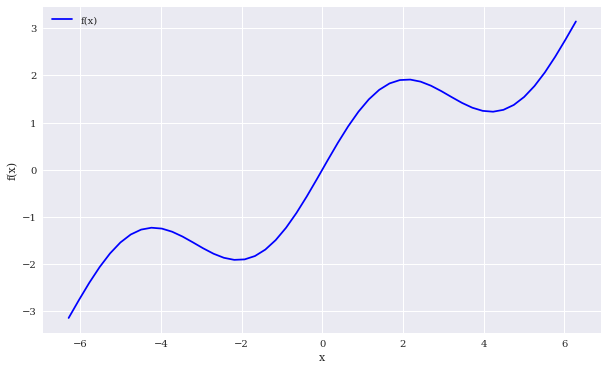

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_01.png');

### Regression

#### Monomials as Basis Functions

In [7]:
res = np.polyfit(x, f(x), deg=1, full=True)  

In [8]:
res  

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [9]:
ry = np.polyval(res[0], x)  

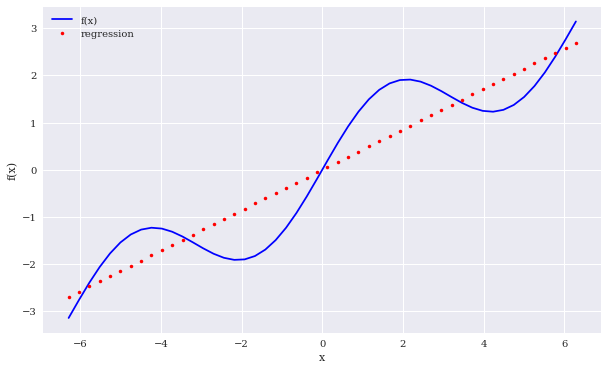

In [10]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_02.png');

In [11]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

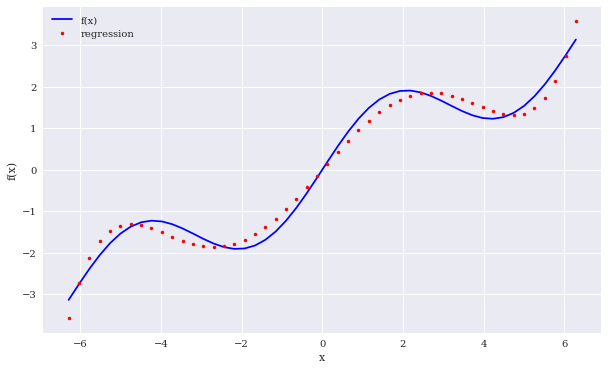

In [12]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_03.png');

In [13]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [14]:
np.allclose(f(x), ry)  

False

In [15]:
np.mean((f(x) - ry) ** 2)  

0.0017769134759517671

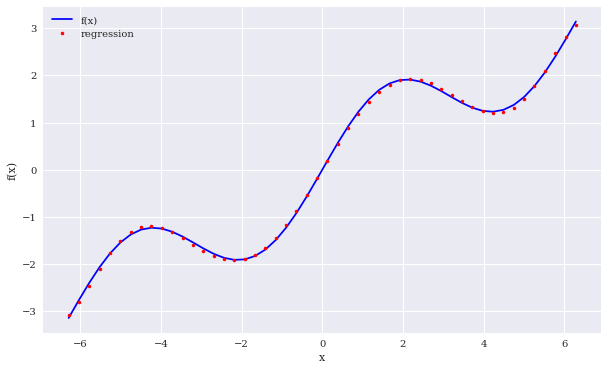

In [16]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_04.png');

#### Individual Basis Functions

In [17]:
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1  

In [18]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]  

In [19]:
reg.round(4)  

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [20]:
ry = np.dot(reg, matrix)  

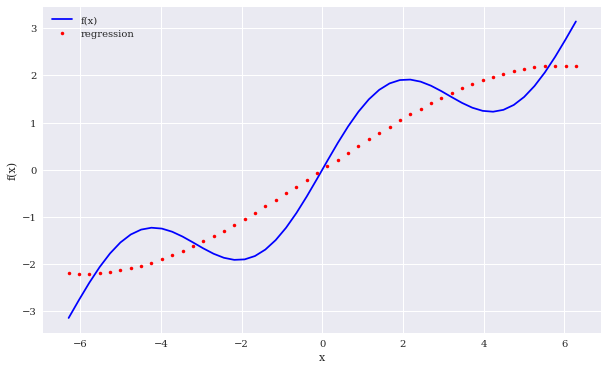

In [21]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_05.png');

In [22]:
matrix[3, :] = np.sin(x)  

In [23]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [24]:
reg.round(4)  

array([0. , 0.5, 0. , 1. ])

In [25]:
ry = np.dot(reg, matrix)

In [26]:
np.allclose(f(x), ry)  

True

In [27]:
np.mean((f(x) - ry) ** 2)  

9.145856119906106e-31

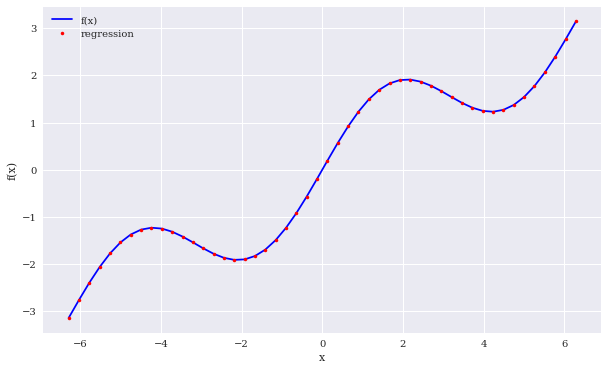

In [28]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_06.png');

#### Noisy Data

In [29]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

In [30]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

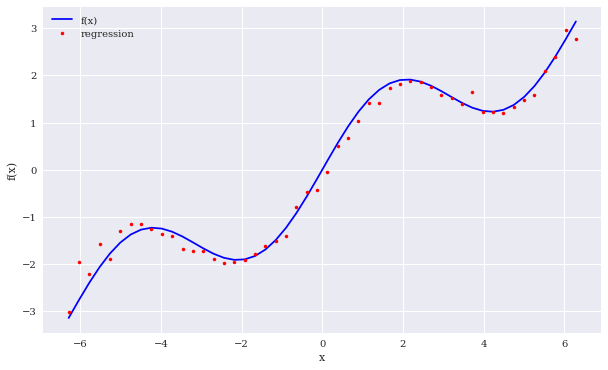

In [31]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_07.png');

#### Unsorted Data

In [32]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

In [33]:
print(xu[:10].round(2))  
print(yu[:10].round(2))  

[ 3.17 -2.36  0.46 -4.06 -0.47  4.42 -1.42  5.8  -0.28 -6.01]
[ 1.56 -1.88  0.68 -1.24 -0.69  1.25 -1.7   2.43 -0.42 -2.73]


In [34]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

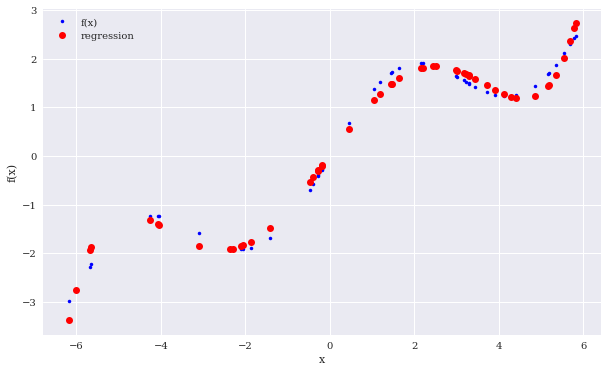

In [35]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_08.png');

#### Multiple Dimensions

In [36]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [37]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)  

In [38]:
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

In [39]:
from mpl_toolkits.mplot3d import Axes3D  

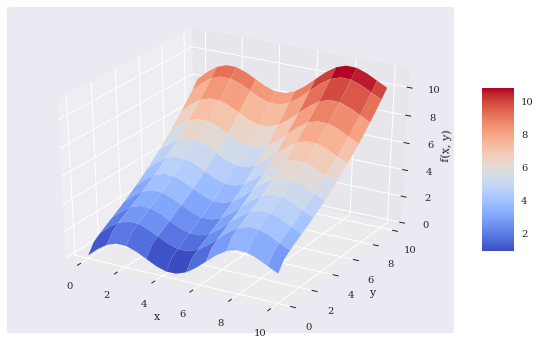

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_09.png');

In [41]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [42]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [43]:
RZ = np.dot(matrix, reg).reshape((20, 20))  

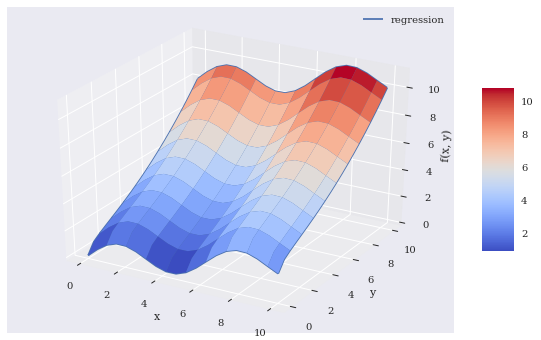

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)  
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_10.png');

### Interpolation

In [45]:
import scipy.interpolate as spi  

In [46]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [47]:
def f(x):
    return np.sin(x) + 0.5 * x

In [48]:
ipo = spi.splrep(x, f(x), k=1)  

In [49]:
iy = spi.splev(x, ipo)  

In [50]:
np.allclose(f(x), iy)  

True

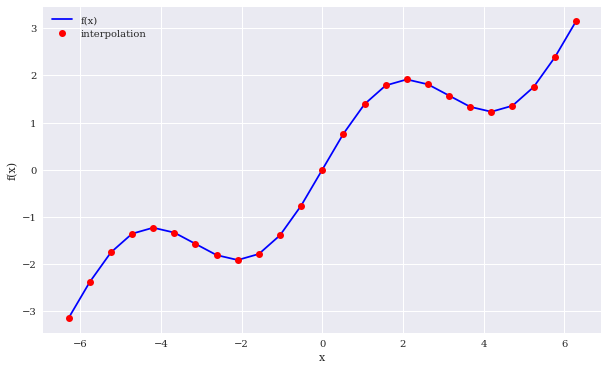

In [51]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_11.png');

In [52]:
xd = np.linspace(1.0, 3.0, 50)  
iyd = spi.splev(xd, ipo)

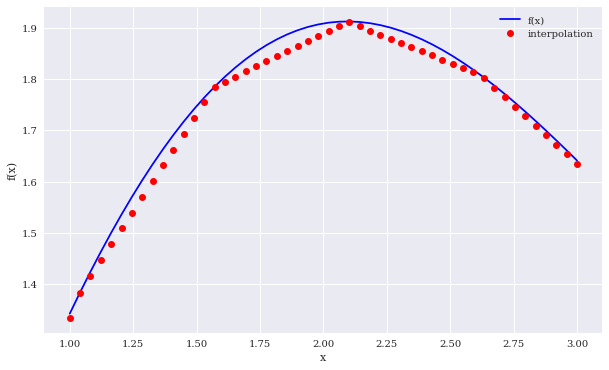

In [53]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_12.png');

In [54]:
ipo = spi.splrep(x, f(x), k=3)  
iyd = spi.splev(xd, ipo)  

In [55]:
np.allclose(f(xd), iyd)  

False

In [56]:
np.mean((f(xd) - iyd) ** 2)  

1.1349319851436892e-08

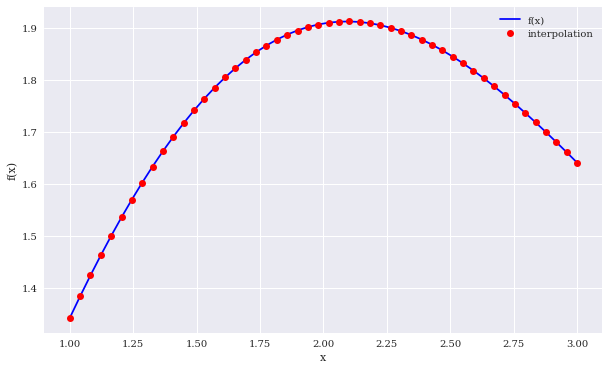

In [57]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_13.png');

## Convex Optimization

In [58]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [59]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

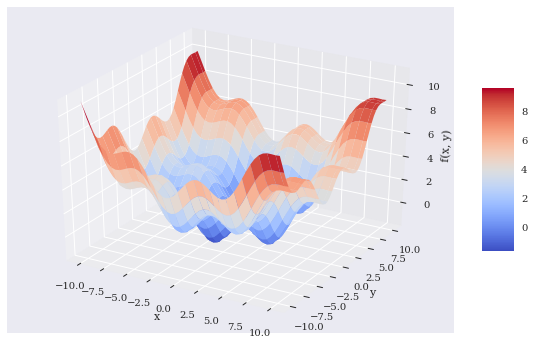

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_14.png');

### Global Optimization

In [61]:
import scipy.optimize as sco  

In [62]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

In [63]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [64]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [65]:
opt1

array([-1.4, -1.4])

In [66]:
fm(opt1)

-1.7748994599769203

### Local Optimization

In [67]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)  

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [68]:
opt2

array([-1.42702972, -1.42876755])

In [69]:
fm(opt2)

-1.7757246992239009

In [70]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained Optimization

In [71]:
import math

In [72]:
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

In [73]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  

In [74]:
bnds = ((0, 1000), (0, 1000))  

In [75]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)  

In [76]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [77]:
result['x']  

array([8.02547122, 1.97452878])

In [78]:
-result['fun']  

9.700883611487832

In [79]:
np.dot(result['x'], [10, 10])  

99.99999999999999

## Integration

In [80]:
import scipy.integrate as sci

In [81]:
def f(x):
    return np.sin(x) + 0.5 * x

In [82]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b)  
Iy = f(Ix)  #  <4>

In [83]:
from matplotlib.patches import Polygon

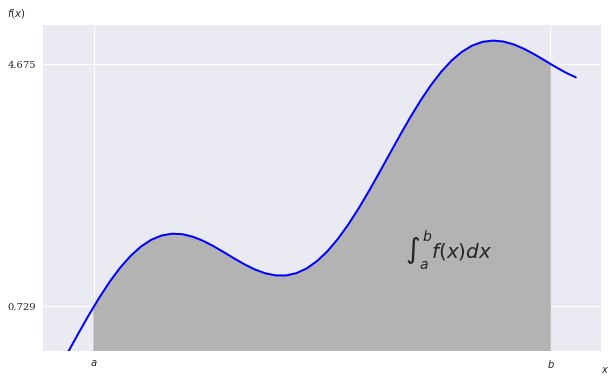

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);
# plt.savefig('../../images/ch11/math_15.png');

### Numerical Integration

In [85]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [86]:
sci.quad(f, a, b)[0]

24.374754718086752

In [87]:
sci.romberg(f, a, b)

24.374754718086713

In [88]:
xi = np.linspace(0.5, 9.5, 25)

In [89]:
sci.trapz(f(xi), xi)

24.352733271544516

In [90]:
sci.simps(f(xi), xi)

24.37496418455075

### Integration by Simulation

In [91]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a  
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic Computation

### Basics

In [92]:
import sympy as sy

In [93]:
x = sy.Symbol('x')  
y = sy.Symbol('y')  

In [94]:
type(x)

sympy.core.symbol.Symbol

In [95]:
sy.sqrt(x)  

sqrt(x)

In [96]:
3 + sy.sqrt(x) - 4 ** 2  

sqrt(x) - 13

In [97]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2  

In [98]:
sy.simplify(f)  

1.5*x**2 + 4.5

In [99]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [100]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [101]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [102]:
%time pi_str = str(sy.N(sy.pi, 400000))  

CPU times: user 253 ms, sys: 8.23 ms, total: 262 ms
Wall time: 262 ms


In [103]:
pi_str[:42]  

'3.1415926535897932384626433832795028841971'

In [104]:
pi_str[-40:]  

'8245672736856312185020980470362464176199'

In [105]:
%time pi_str.find('061072')  

CPU times: user 94 µs, sys: 1e+03 ns, total: 95 µs
Wall time: 97 µs


80847

### Equations

In [106]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [107]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [108]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [109]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### Integration and Differentiation

In [110]:
a, b = sy.symbols('a b')  

In [111]:
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))  

In [112]:
print(sy.pretty(I))  

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [113]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)  

In [114]:
print(sy.pretty(int_func))  

      2         
0.25*x  - cos(x)


In [115]:
Fb = int_func.subs(x, 9.5).evalf()  
Fa = int_func.subs(x, 0.5).evalf()  

In [116]:
Fb - Fa  

24.3747547180867

In [117]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))  

In [118]:
print(sy.pretty(int_func_limits))  

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [119]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()  

24.3747547180868

In [120]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))  

24.3747547180867

### Differentiation

In [121]:
int_func.diff()

0.5*x + sin(x)

In [122]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)  

In [123]:
del_x = sy.diff(f, x)  
del_x  

0.1*x + cos(x)

In [124]:
del_y = sy.diff(f, y)  
del_y  

0.1*y + cos(y)

In [125]:
xo = sy.nsolve(del_x, -1.5)  
xo  

-1.42755177876459

In [126]:
yo = sy.nsolve(del_y, -1.5)  
yo  

-1.42755177876459

In [127]:
f.subs({x : xo, y : yo}).evalf()  

-1.77572565314742

In [128]:
xo = sy.nsolve(del_x, 1.5)
xo

1.74632928225285

In [129]:
yo = sy.nsolve(del_y, 1.5)  
yo

1.74632928225285

In [130]:
f.subs({x : xo, y : yo}).evalf()  

2.27423381055640

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>